In [34]:
import random
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
#реализация
def quicksort(nums, fst, lst):
   if fst >= lst: return
 
   i, j = fst, lst
   pivot = nums[random.randint(fst, lst)]
 
   while i <= j:
       while nums[i] < pivot: i += 1
       while nums[j] > pivot: j -= 1
       if i <= j:
           nums[i], nums[j] = nums[j], nums[i]
           i, j = i + 1, j - 1
   quicksort(nums, fst, j)
   quicksort(nums, i, lst)

In [9]:
tt=[4,3,2,1]
quicksort(tt,0,3)
tt

[1, 2, 3, 4]

In [11]:
df = pd.DataFrame({'n':[0 for n in range(0,10000)]})
df['time']=0
df['time1']=0

In [40]:
#генерация массивов
for n in range(1,10000):
    tt = np.array([])
    tt1 = np.array([])
    for i in range(10):
        nums = [random.randint(-100,100) for _ in range(n)]
        nums1 = [random.randint(-100,100) for _ in range(2*n)]
        start_time = datetime.now()
        quicksort(nums,0,len(nums)-1)
        tt = np.append(tt,(datetime.now()-start_time).total_seconds())
        start_time = datetime.now()
        quicksort(nums1,0,len(nums1)-1)
        tt1 = np.append(tt,(datetime.now()-start_time).total_seconds())
    df.loc[n,'time'] = tt.mean()
    df.loc[n,'time1'] = tt1.mean()

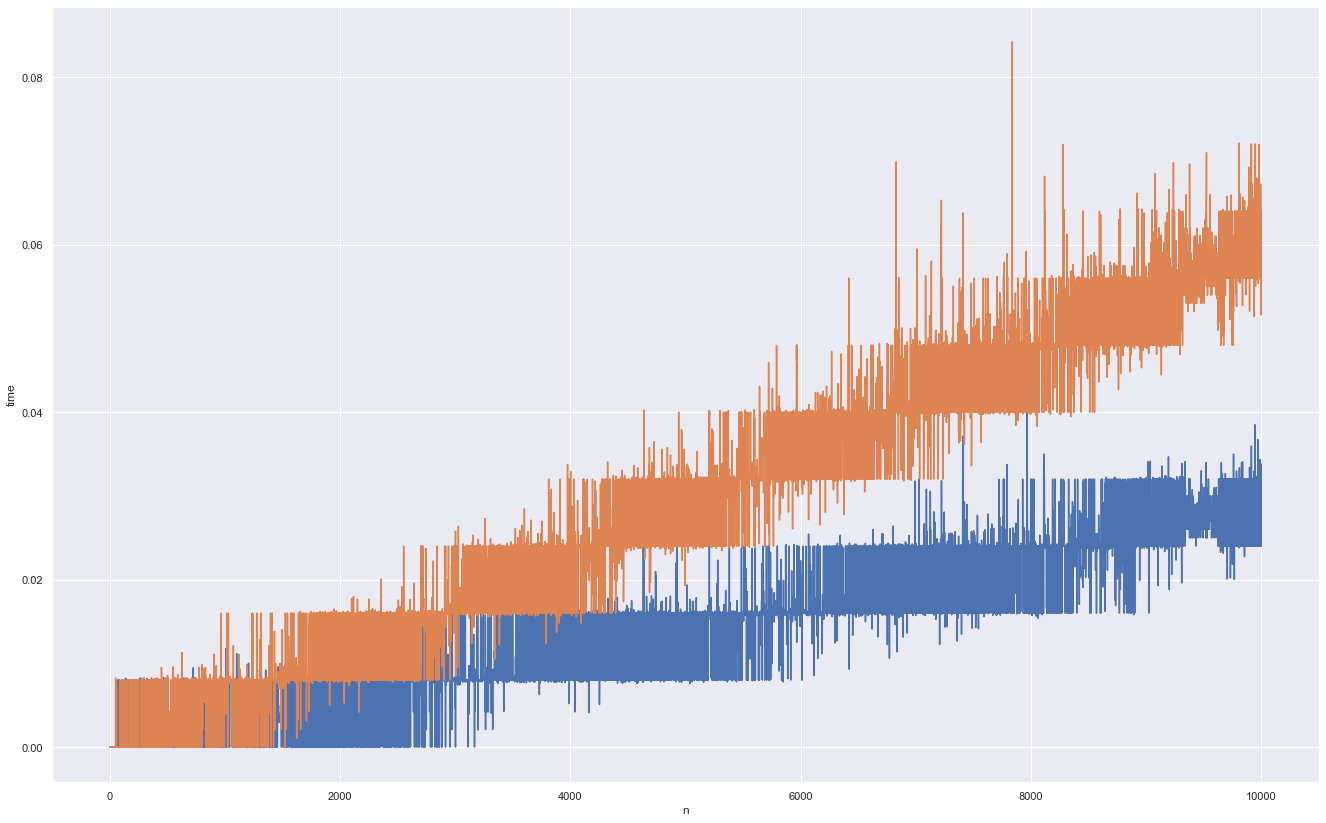

In [31]:
#визуализация
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(22.7,14.27)})
fig, ax = plt.subplots()
plot = sns.lineplot(data=df,x='n',y='time')
fig = plot.get_figure()
plot = sns.lineplot(data=df,x='n',y='time1')
fig = plot.get_figure()
fig.savefig('pict.png')

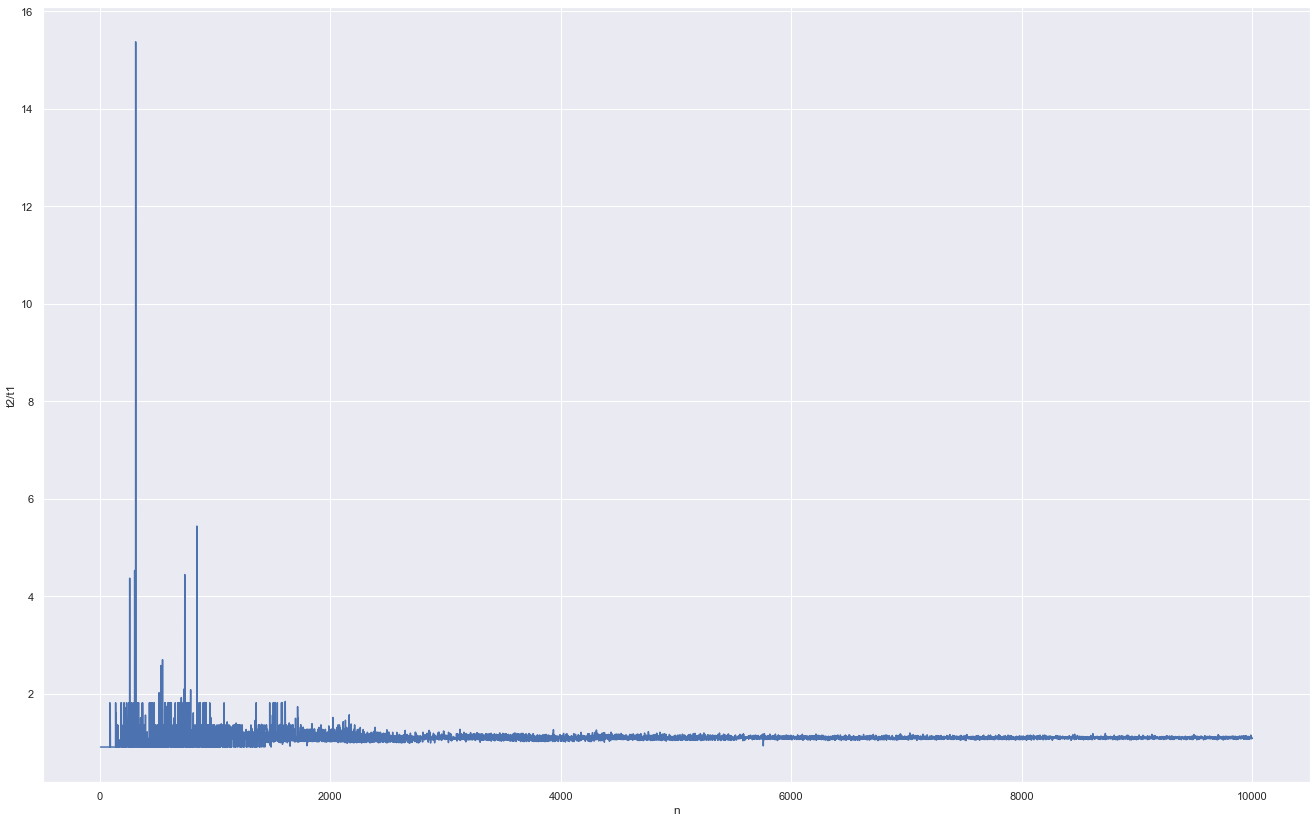

In [41]:
df['t2/t1']=df['time1']/df['time']
fig1, ax1 = plt.subplots()
plot = sns.lineplot(data=df,x='n',y='t2/t1')
fig = plot.get_figure()

In [8]:
df

,n,time
0,1,0.000000
1,2,0.000997
2,3,0.000000
3,4,0.000000
4,5,0.000000
...,...,...
9995,9996,0.028997
9996,9997,0.028024
9997,9998,0.028006
9998,9999,0.028013


In [27]:
for n in range(1,10000):
  nums = random.sample(range(10000), n)
  nums.sort(reverse=True)
  start_time = datetime.now()
  quicksort(nums,0,len(nums)-1)
  df.loc[n,'time'] = (datetime.now()-start_time).total_seconds()
  df.loc[n,'n'] = n

In [39]:
tt = np.array([])
tt = np.append(tt,3)
tt.mean()

3.0

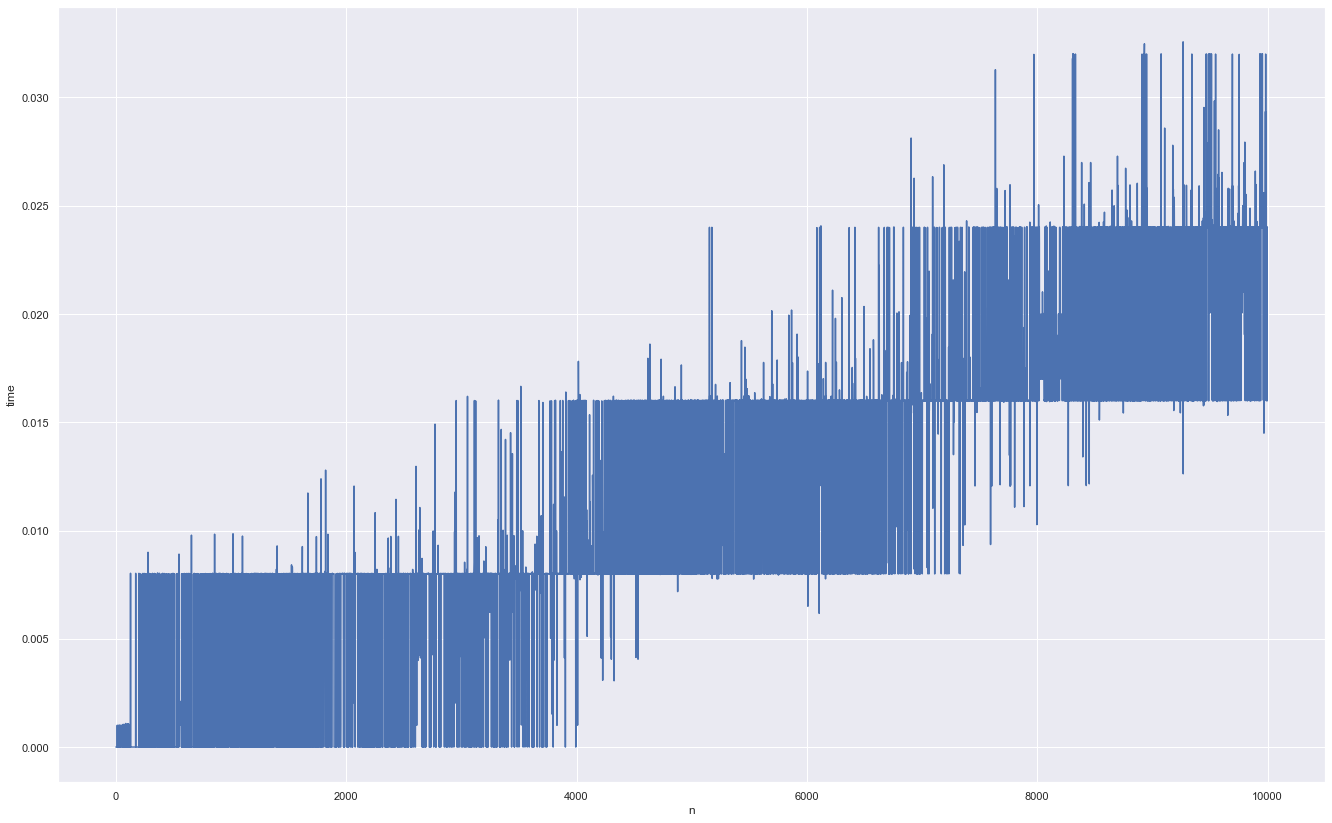

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(22.7,14.27)})
fig1, ax1 = plt.subplots()
plot = sns.lineplot(data=df,x='n',y='time')
fig1 = plot.get_figure()
fig1.savefig('pict1.png')